In [ ]:
%matplotlib inline


PyTorch: optim
--------------

上一小节我们使用PyTorch的nn包来构建一个具有一个隐藏层的完全连接的ReLU网络，经过训练可以通过最小化平方距离来从x预测y。

但是我们一直在手动更新模型的权重，这一小节我们将使用optim包定义一个优化器，该优化器将为我们更新权重。optim软件包定义了许多深度学习常用的优化算法，包括SGD + momentum，RMSProp，Adam等。


In [39]:
import torch
import matplotlib.pyplot as plt


# N是批量大小，D_in是输入维度;
# H是隐藏层维度，D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建随机输入和输出张量
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 使用nn包定义我们的模型和损失函数
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# 使用optim包定义一个优化器，该优化器将为我们更新模型的权重。 在这里，我们比较几种优化方法
learning_rate = 1e-4


# SGD随机梯度下降
#opt_SGD         = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 加动量的SGD,在SGD函数里指定momentum的值即可
#opt_Momentum    = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.8)
# RMSprop指定参数alpha
#opt_RMSprop     = torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)
# Adadelta指定参数rho
#opt_Adadelta    = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
# Adam 参数betas=(0.9, 0.99)
opt_Adam        = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.95))
optimizer  =opt_Adam  
#创建图并命名
plt.figure('Loss')
iter_plot = []
loss_plot = []
for t in range(500):
    # 前向传递：通过将x传递给模型来预测y。
    y_pred = model(x)

    # 计算和打印损失.
    loss = loss_fn(y_pred, y)
    iter_plot.append(t)
    loss_plot.append(loss)
    print(t, loss.item())

    # 在向后传递之前，使用优化器将要更新的变量的所有梯度都归零（这是模型的可学习权重）。 
    # 这是因为默认情况下，每当调用.backward（）时，梯度都会累积在缓冲区中（即不会被覆盖）。 
    # 有关更多详细信息，请查看torch.autograd.backward的文档。
    
    optimizer.zero_grad()

    # 向后传递：计算损耗相对于模型的所有可学习参数的梯度。 
    loss.backward()

    # 在Optimizer上调用step函数可对其参数进行更新
    optimizer.step()

0 748.1788940429688
1 586.8396606445312
2 465.3325500488281
3 372.1656494140625
4 298.6750793457031
5 238.8961639404297
6 189.4934539794922
7 148.59738159179688
8 115.24201965332031
9 88.82135772705078
10 68.34034729003906
11 53.006317138671875
12 42.05740737915039
13 34.68577194213867
14 30.3123779296875
15 28.087533950805664
16 27.205524444580078
17 26.9034366607666
18 26.509788513183594
19 25.72061538696289
20 24.366580963134766
21 22.492830276489258
22 20.298429489135742
23 17.982421875
24 15.7513427734375
25 13.705915451049805
26 11.914935111999512
27 10.37183952331543
28 9.079544067382812
29 8.031373977661133
30 7.207005977630615
31 6.578147888183594
32 6.093626022338867
33 5.695382595062256
34 5.337945461273193
35 4.991775035858154
36 4.639622688293457
37 4.27119779586792
38 3.881953477859497
39 3.4789302349090576
40 3.0765867233276367
41 2.6898581981658936
42 2.3344690799713135
43 2.0288403034210205
44 1.7825134992599487
45 1.5985748767852783
46 1.47377347946167
47 1.3915367126

398 0.029010919854044914
399 0.029268814250826836
400 0.024663787335157394
401 0.01612689346075058
402 0.018404986709356308
403 0.021135104820132256
404 0.019217580556869507
405 0.01758272387087345
406 0.019421221688389778
407 0.02000175043940544
408 0.021848246455192566
409 0.028520889580249786
410 0.02834424190223217
411 0.031801488250494
412 0.042212117463350296
413 0.05312822386622429
414 0.048845138400793076
415 0.030512645840644836
416 0.03143121302127838
417 0.03645768016576767
418 0.025864461436867714
419 0.023599302396178246
420 0.026731425896286964
421 0.022207647562026978
422 0.020214363932609558
423 0.021200772374868393
424 0.019666893407702446
425 0.01783144660294056
426 0.01816175878047943
427 0.01963655650615692
428 0.022328360006213188
429 0.022652747109532356
430 0.027343757450580597
431 0.028825590386986732
432 0.027985360473394394
433 0.022996429353952408
434 0.02340763621032238
435 0.028513994067907333
436 0.03172450140118599
437 0.03441914916038513
438 0.0363847278

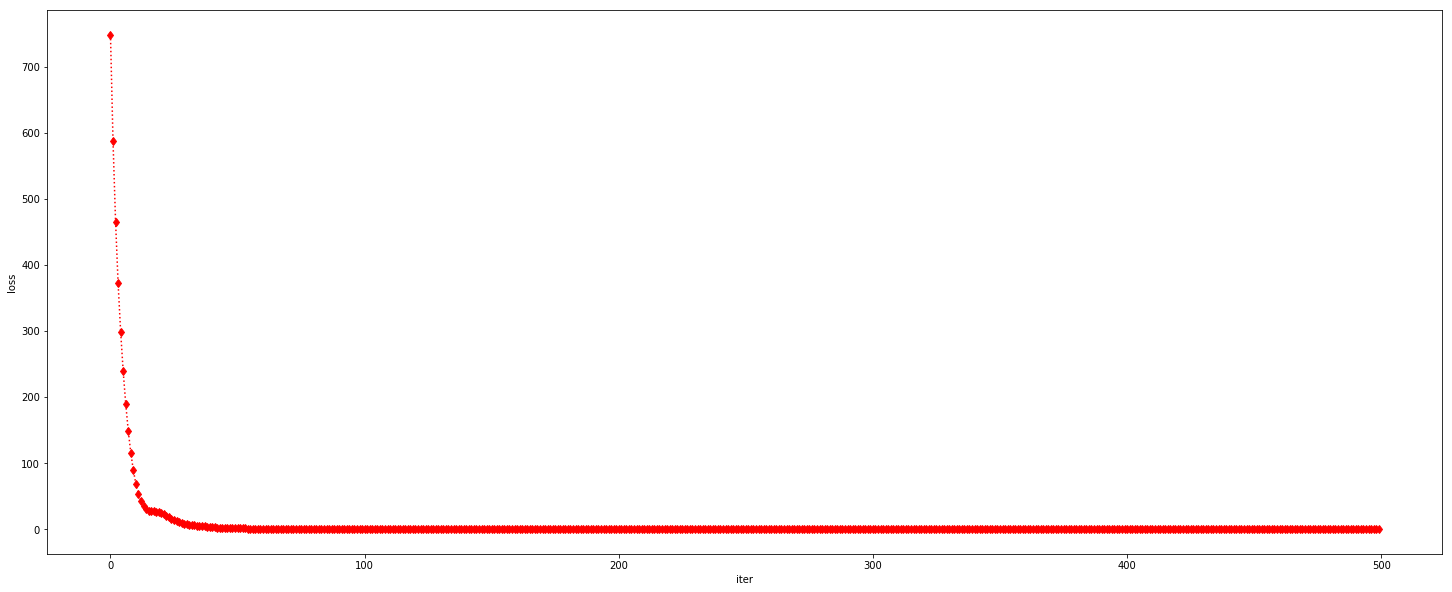

In [40]:
plt.figure(figsize=(25,10))
ax = plt.subplot()
#设置x轴、y轴名称
ax.set_xlabel('iter')
ax.set_ylabel('loss')
plt.plot(iter_plot,loss_plot,marker='d',linestyle=':',color='r')
plt.show()